In [1]:
from numpy.random import default_rng
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
rng = default_rng(seed=2024)

# create random x
x = rng.uniform(-1, 1, 100)
# create random y
y = x * 0.6 + rng.normal(0, 0.25, 100)

In [3]:
def likelihood(beta, alpha, x, y):
    return np.prod(norm(x * beta + alpha, 0.25).pdf(y))

In [4]:
rng = default_rng(seed=20240316)

num_iterations = 1e4
samples_beta = []
proposals_beta = []
samples_alpha = []
proposals_alpha = []
results = []

current_beta = 0.55
current_alpha = 0.1

for _ in range(int(num_iterations)):
    # record current position
    samples_beta.append(current_beta)
    samples_alpha.append(current_alpha)
    # flip coin to generate proposal
    proposal_beta = current_beta + rng.normal(0, 0.1)
    proposal_alpha = current_alpha + rng.normal(0, 0.05)
    proposals_beta.append(proposal_beta)
    proposals_alpha.append(proposal_alpha)
    # decide whether to accept proposal or not
    prob_move = likelihood(proposal_beta, proposal_alpha, x, y) / likelihood(current_beta, current_alpha, x, y)
    if rng.random() < prob_move:
        current_beta = proposal_beta
        current_alpha = proposal_alpha
        results.append(True)
    else:
        results.append(False)

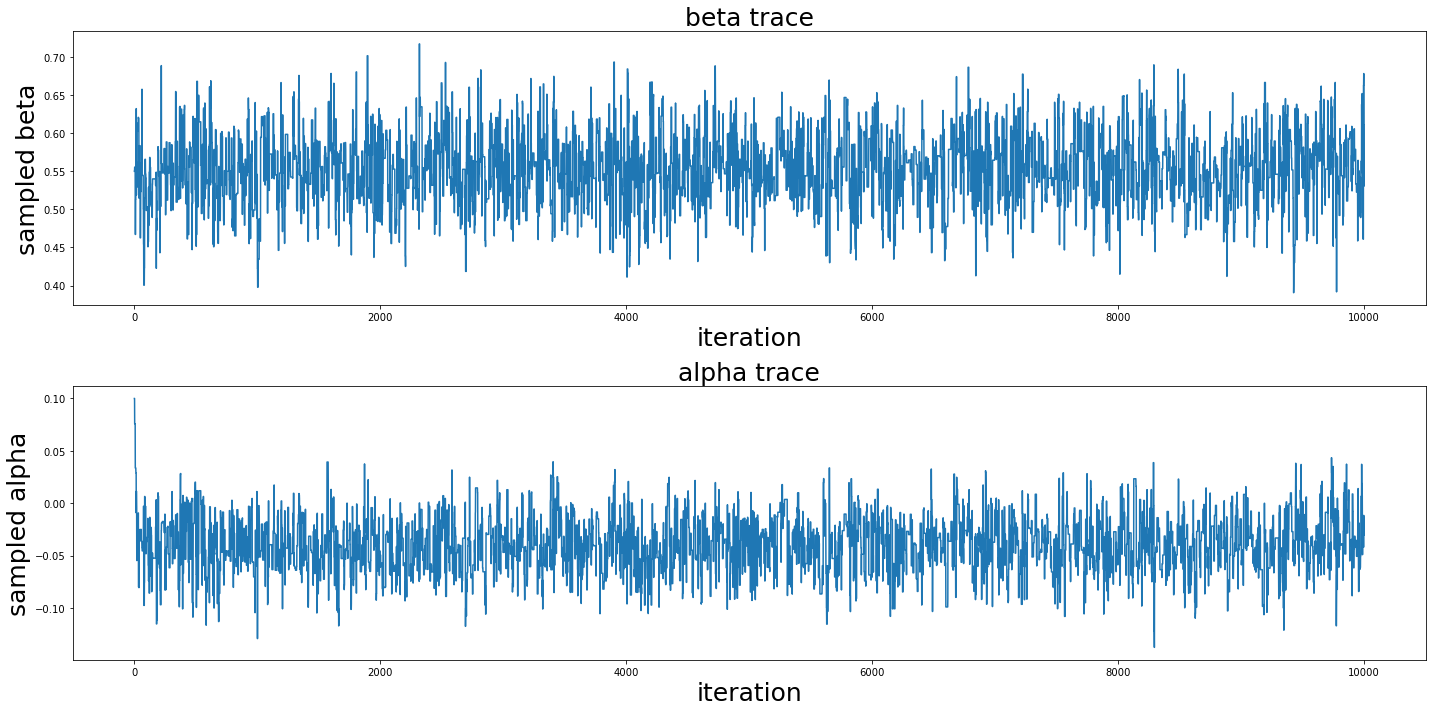

In [5]:
idx = 10000
fig, ax = plt.subplots(figsize=(20, 10), nrows=2)
ax[0].plot(range(idx), samples_beta[:idx+1], '-')
ax[0].set_title('beta trace', fontsize=25)
ax[0].set_xlabel('iteration', fontsize=25)
ax[0].set_ylabel('sampled beta', fontsize=25)

ax[1].plot(range(idx), samples_alpha[:idx+1], '-')
ax[1].set_title('alpha trace', fontsize=25)
ax[1].set_xlabel('iteration', fontsize=25)
ax[1].set_ylabel('sampled alpha', fontsize=25)
plt.tight_layout()

In [6]:
# grid approximation
betas = np.arange(0.4, 0.75, 0.01)
alphas = np.arange(-0.15, 0.15, 0.01)
likelihoods = np.zeros((len(betas), len(alphas)))
for beta in betas:
    for alpha in alphas:
        likelihoods[betas == beta, alphas == alpha] = likelihood(beta, alpha, x, y)
probabilities = likelihoods / np.sum(likelihoods)

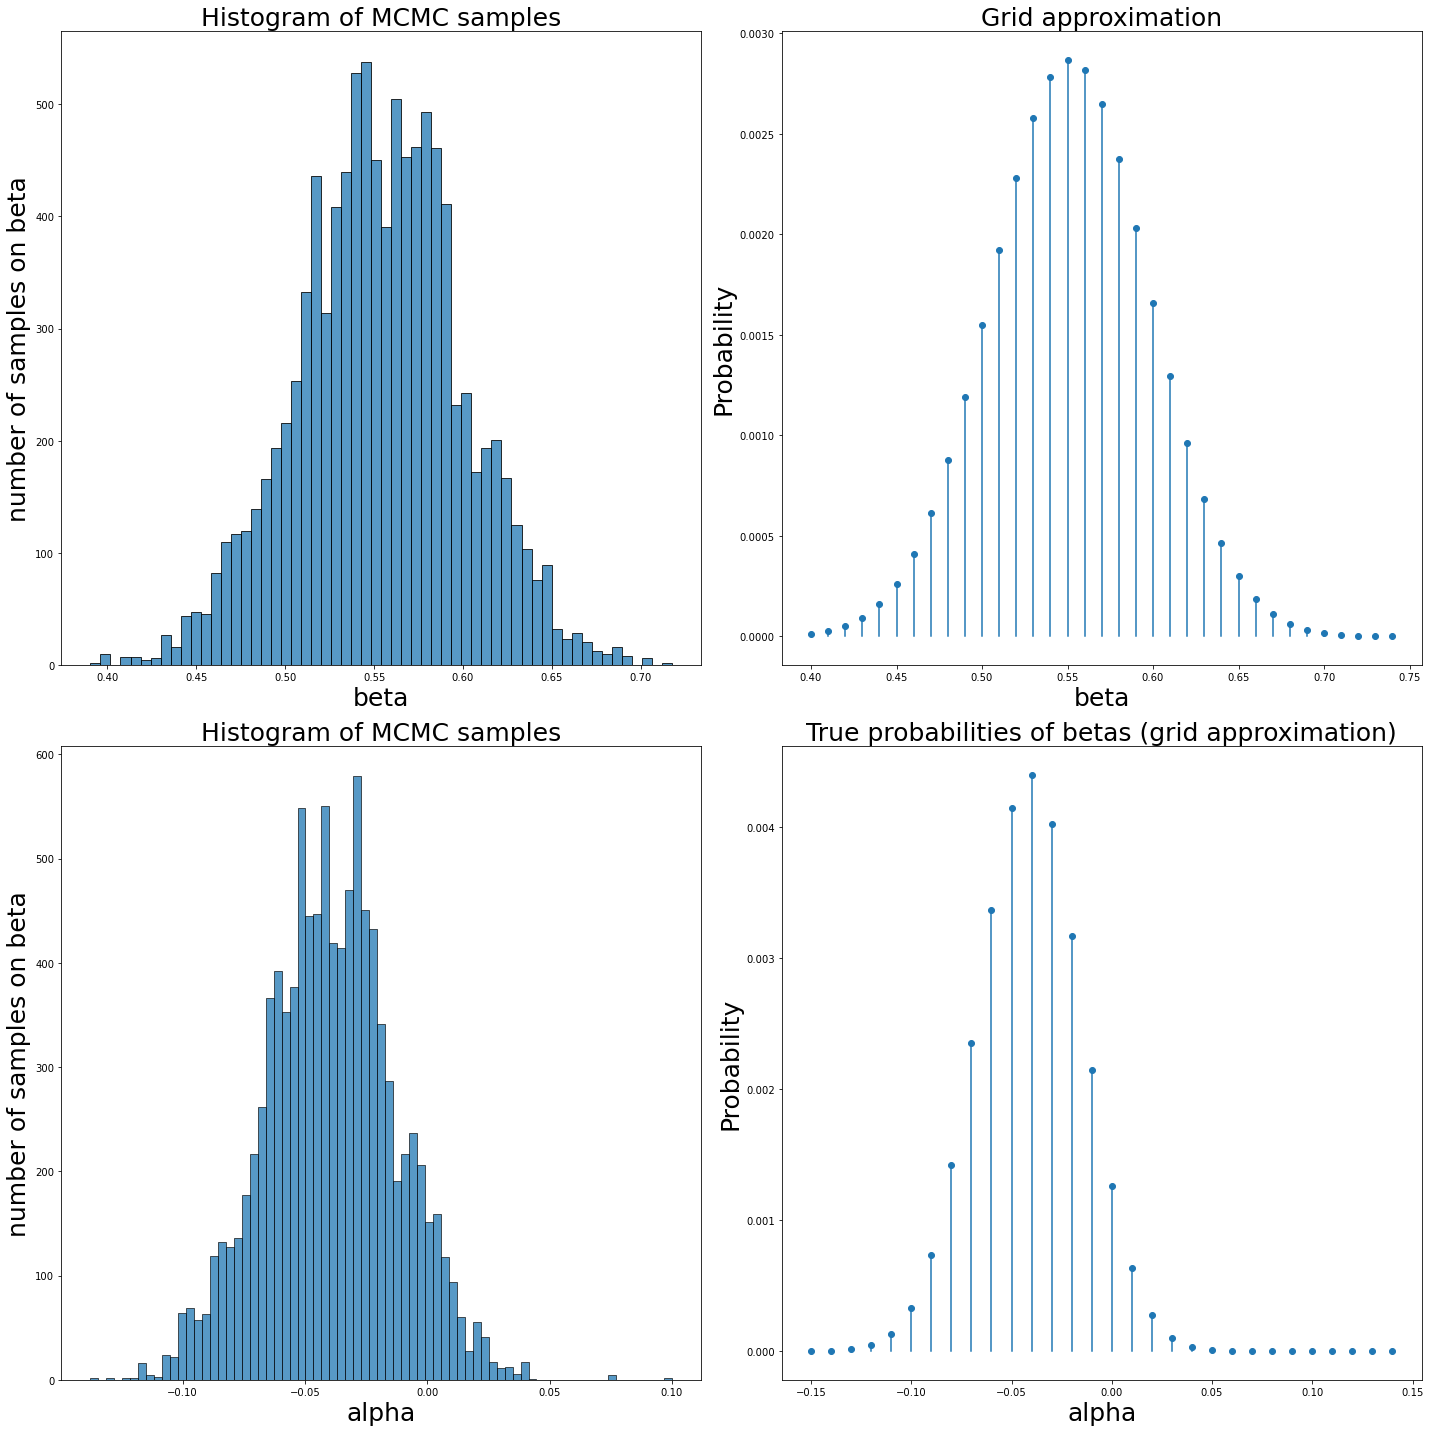

In [7]:
fig, ax = plt.subplots(figsize=(20, 20), ncols=2, nrows=2)
sns.histplot(samples_beta, ax=ax[0][0], color='tab:blue')
ax[0][0].set_title('Histogram of MCMC samples', fontsize=25)
ax[0][0].set_xlabel('beta', fontsize=25)
ax[0][0].set_ylabel('number of samples on beta', fontsize=25)

for beta, probability in zip(betas, np.mean(probabilities, axis=1)):
    ax[0][1].plot([beta, beta], [0, probability], color='tab:blue')
ax[0][1].scatter(betas, np.mean(probabilities, axis=1), color='tab:blue')
ax[0][1].set_xlabel('beta', fontsize=25)
ax[0][1].set_ylabel('Probability', fontsize=25)
ax[0][1].set_title('Grid approximation', fontsize=25)

sns.histplot(samples_alpha, ax=ax[1][0], color='tab:blue')
ax[1][0].set_title('Histogram of MCMC samples', fontsize=25)
ax[1][0].set_xlabel('alpha', fontsize=25)
ax[1][0].set_ylabel('number of samples on beta', fontsize=25)

for beta, probability in zip(alphas, np.mean(probabilities, axis=0)):
    ax[1][1].plot([beta, beta], [0, probability], color='tab:blue')
ax[1][1].scatter(alphas, np.mean(probabilities, axis=0), color='tab:blue')
ax[1][1].set_xlabel('alpha', fontsize=25)
ax[1][1].set_ylabel('Probability', fontsize=25)
ax[1][1].set_title('True probabilities of betas (grid approximation)', fontsize=25)
plt.tight_layout()

Text(767.7272727272725, 0.5, 'beta')

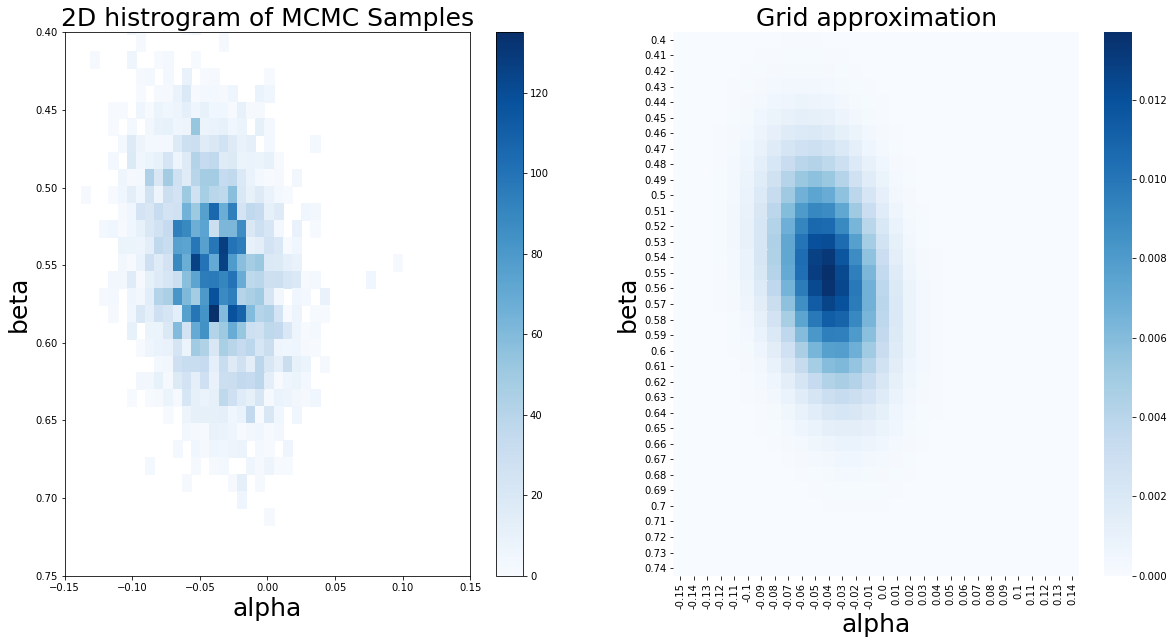

In [8]:
fig, ax = plt.subplots(figsize=(20, 10), ncols=2)
sns.histplot(y=samples_beta, x=samples_alpha, cmap='Blues', ax=ax[0], bins=(35,30), cbar=True)
ax[0].set_title('2D histrogram of MCMC Samples', fontsize=25)
ax[0].set_xlabel('alpha', fontsize=25)
ax[0].set_ylabel('beta', fontsize=25)
ax[0].set_xlim(-0.15, 0.15)
ax[0].set_ylim(0.75, 0.4)
sns.heatmap(probabilities, ax=ax[1], xticklabels=np.round(alphas,2), yticklabels=np.round(betas, 2), cmap='Blues')
ax[1].set_title('Grid approximation', fontsize=25)
ax[1].set_xlabel('alpha', fontsize=25)
ax[1].set_ylabel('beta', fontsize=25)

In [9]:
for idx in range(100):
    fig, axes = plt.subplots(figsize=(30, 10))
    ax1 = plt.subplot(1,3,1)
    ax2 = plt.subplot(1,3,2)
    ax3 = plt.subplot(2,3,3)
    ax4 = plt.subplot(2,3,6)
    ax = [ax1, ax2, ax3, ax4]
    # plot the lines
    sns.lineplot(x=x, y=samples_beta[idx] * x + samples_alpha[idx], ax=ax[0], color='tab:orange', lw=4)
    sns.lineplot(x=x, y=proposals_beta[idx] * x + proposals_alpha[idx], ax=ax[0], color='tab:blue', lw=4)
    if results[idx]:
        # arrow to show the move
        ax[0].annotate('', xy=(1, proposals_beta[idx] + proposals_alpha[idx]), xytext=(1, samples_beta[idx] + samples_alpha[idx]), arrowprops=dict(facecolor='tab:green', shrink=0.05))
    else:
        # arrow to show the move
        ax[0].annotate('', xy=(1, proposals_beta[idx] + proposals_alpha[idx]), xytext=(1, samples_beta[idx] + samples_alpha[idx]), arrowprops=dict(facecolor='tab:red', shrink=0.05))
    sns.scatterplot(x=x, y=y, color='tab:gray', ax=ax[0])
    ax[0].set_xlim(-1.05, 1.05)
    
    ax[1].scatter(samples_beta[idx], samples_alpha[idx], color='tab:orange', s=500)
    ax[1].scatter(proposals_beta[idx], proposals_alpha[idx], color='tab:blue', s=500)
    # arrow to show the move
    if results[idx]:
        ax[1].annotate('', xy=(proposals_beta[idx], proposals_alpha[idx]), xytext=(samples_beta[idx], samples_alpha[idx]), arrowprops=dict(facecolor='tab:green', shrink=0.05))
    else:
        ax[1].annotate('', xy=(proposals_beta[idx], proposals_alpha[idx]), xytext=(samples_beta[idx], samples_alpha[idx]), arrowprops=dict(facecolor='tab:red', shrink=0.05))
    ax[1].set_xlim(np.min(proposals_beta[:101]), np.max(proposals_beta[:101]))
    ax[1].set_ylim(np.min(proposals_alpha[:101]), np.max(proposals_alpha[:101]))
    ax[1].set_xlabel('Beta', fontsize=40)
    ax[1].set_ylabel('Alpha', fontsize=40)

    ax[2].plot(range(idx + 1), samples_beta[:idx + 1], 'o-', markersize=20, lw=2)
    ax[2].set_xlim(0, 100)
    ax[2].set_ylim(0.45, 0.75)
    ax[2].set_title('MCMC trace (beta)', fontsize=40)
    ax[2].set_xlabel('iteration', fontsize=40)
    ax[2].set_ylabel('sampled beta', fontsize=40)

    ax[3].plot(range(idx + 1), samples_alpha[:idx + 1], 'o-', markersize=20, lw=2)
    ax[3].set_xlim(0, 100)
    ax[3].set_ylim(-0.15, 0.15)
    ax[3].set_title('MCMC trace (alpha)', fontsize=40)
    ax[3].set_xlabel('iteration', fontsize=40)
    ax[3].set_ylabel('sampled alpha', fontsize=40)

    plt.tight_layout()
    plt.savefig(f'lines_continuous_two_params/frame{idx:07d}.png')
    plt.close()

In [10]:
for idx in range(4):
    fig, axes = plt.subplots(figsize=(30, 10))
    ax1 = plt.subplot(1,3,1)
    ax2 = plt.subplot(1,3,2)
    ax3 = plt.subplot(2,3,3)
    ax4 = plt.subplot(2,3,6)
    ax = [ax1, ax2, ax3, ax4]
    # plot the lines
    sns.lineplot(x=x, y=samples_beta[idx] * x + samples_alpha[idx], ax=ax[0], color='tab:orange', lw=4)
    sns.lineplot(x=x, y=proposals_beta[idx] * x + proposals_alpha[idx], ax=ax[0], color='tab:blue', lw=4)
    if results[idx]:
        # arrow to show the move
        ax[0].annotate('', xy=(1, proposals_beta[idx] + proposals_alpha[idx]), xytext=(1, samples_beta[idx] + samples_alpha[idx]), arrowprops=dict(facecolor='tab:green', shrink=0.05))
    else:
        # arrow to show the move
        ax[0].annotate('', xy=(1, proposals_beta[idx] + proposals_alpha[idx]), xytext=(1, samples_beta[idx] + samples_alpha[idx]), arrowprops=dict(facecolor='tab:red', shrink=0.05))
    sns.scatterplot(x=x, y=y, color='tab:gray', ax=ax[0])
    ax[0].set_xlim(-1.05, 1.05)
    
    ax[1].scatter(samples_beta[idx], samples_alpha[idx], color='tab:orange', s=500)
    ax[1].scatter(proposals_beta[idx], proposals_alpha[idx], color='tab:blue', s=500)
    # arrow to show the move
    if results[idx]:
        ax[1].annotate('', xy=(proposals_beta[idx], proposals_alpha[idx]), xytext=(samples_beta[idx], samples_alpha[idx]), arrowprops=dict(facecolor='tab:green', shrink=0.05))
    else:
        ax[1].annotate('', xy=(proposals_beta[idx], proposals_alpha[idx]), xytext=(samples_beta[idx], samples_alpha[idx]), arrowprops=dict(facecolor='tab:red', shrink=0.05))
    ax[1].set_xlim(np.min(proposals_beta[:101]), np.max(proposals_beta[:101]))
    ax[1].set_ylim(np.min(proposals_alpha[:101]), np.max(proposals_alpha[:101]))
    ax[1].set_xlabel('Beta', fontsize=40)
    ax[1].set_ylabel('Alpha', fontsize=40)

    ax[2].plot(range(idx + 1), samples_beta[:idx + 1], 'o-', markersize=20, lw=2)
    ax[2].set_xlim(0, 10)
    ax[2].set_ylim(0.45, 0.75)
    ax[2].set_title('MCMC trace (beta)', fontsize=40)
    ax[2].set_xlabel('iteration', fontsize=40)
    ax[2].set_ylabel('sampled beta', fontsize=40)

    ax[3].plot(range(idx + 1), samples_alpha[:idx + 1], 'o-', markersize=20, lw=2)
    ax[3].set_xlim(0, 10)
    ax[3].set_ylim(-0.15, 0.15)
    ax[3].set_title('MCMC trace (alpha)', fontsize=40)
    ax[3].set_xlabel('iteration', fontsize=40)
    ax[3].set_ylabel('sampled alpha', fontsize=40)

    plt.tight_layout()
    plt.savefig(f'lines_continuous_two_params/extra_{idx:07d}.png')
    plt.close()